In [1]:
import pickle

pickle_in = open("X_12classes.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_12classes.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0


In [2]:
X_train = X[:11785,:]
X_test = X[11785:,:]
y_train = y[:11785,:]
y_test = y[11785:,:]

print("X train shape " + str(X_train.shape))
print("X test shape " + str(X_test.shape))
print("y train shape " + str(y_train.shape))
print("y test shape " + str(y_test.shape))

X train shape (11785, 224, 224, 3)
X test shape (2498, 224, 224, 3)
y train shape (11785, 12)
y test shape (2498, 12)


In [3]:
import numpy as np
import os
import time
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.layers import Input, Dropout, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from tensorflow.keras.callbacks import TensorBoard

Using TensorFlow backend.


In [4]:
image_input = Input(shape=(299, 299, 3))

model = InceptionResNetV2(input_tensor=image_input, include_top=True, weights=None)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
_____________________________________

conv_7b_ac (Activation)         (None, 8, 8, 1536)   0           conv_7b_bn[0][0]                 
__________________________________________________________________________________________________
avg_pool (GlobalAveragePooling2 (None, 1536)         0           conv_7b_ac[0][0]                 
__________________________________________________________________________________________________
predictions (Dense)             (None, 1000)         1537000     avg_pool[0][0]                   
Total params: 55,873,736
Trainable params: 55,813,192
Non-trainable params: 60,544
__________________________________________________________________________________________________


In [5]:
last_layer = model.get_layer('conv_7b_ac').output
x = GlobalAveragePooling2D(name ="avg")(last_layer) 
#x = Flatten(name='flatten')(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation='relu')(x)
#x = Dropout(0.5)(x) 
x = Dense(12, activation='softmax', name='outputWildlife')(x)
WildlifeModel = Model(image_input, x)
WildlifeModel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

conv2d_52 (Conv2D)              (None, 35, 35, 32)   10240       block35_6_ac[0][0]               
__________________________________________________________________________________________________
batch_normalization_52 (BatchNo (None, 35, 35, 32)   96          conv2d_52[0][0]                  
__________________________________________________________________________________________________
activation_52 (Activation)      (None, 35, 35, 32)   0           batch_normalization_52[0][0]     
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 35, 35, 32)   10240       block35_6_ac[0][0]               
__________________________________________________________________________________________________
conv2d_53 (Conv2D)              (None, 35, 35, 48)   13824       activation_52[0][0]              
__________________________________________________________________________________________________
batch_norm

activation_201 (Activation)     (None, 8, 8, 192)    0           batch_normalization_201[0][0]    
__________________________________________________________________________________________________
conv2d_202 (Conv2D)             (None, 8, 8, 224)    129024      activation_201[0][0]             
__________________________________________________________________________________________________
batch_normalization_202 (BatchN (None, 8, 8, 224)    672         conv2d_202[0][0]                 
__________________________________________________________________________________________________
activation_202 (Activation)     (None, 8, 8, 224)    0           batch_normalization_202[0][0]    
__________________________________________________________________________________________________
conv2d_200 (Conv2D)             (None, 8, 8, 192)    399360      block8_9_ac[0][0]                
__________________________________________________________________________________________________
conv2d_203

In [8]:
NAME = "InceptionResnet-Random{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='Network comparison-random-200-12 classes/{}'.format(NAME))

t=time.time()
WildlifeModel.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
WildlifeModel.fit(X_train, y_train, epochs = 200, batch_size = 16, validation_data=(X_test, y_test), callbacks = [tensorboard])
print('Training time: %s' % (t - time.time()))

Instructions for updating:
Use tf.cast instead.
Train on 11785 samples, validate on 2500 samples
Epoch 1/200
11785/11785 [==============================] - 296s 25ms/step - loss: 1.6776 - acc: 0.4383 - val_loss: 1.8306 - val_acc: 0.4280
Epoch 2/200
11785/11785 [==============================] - 262s 22ms/step - loss: 1.1896 - acc: 0.6013 - val_loss: 1.2823 - val_acc: 0.5736
Epoch 3/200
11785/11785 [==============================] - 263s 22ms/step - loss: 0.9296 - acc: 0.6940 - val_loss: 1.1713 - val_acc: 0.6144
Epoch 4/200
11785/11785 [==============================] - 257s 22ms/step - loss: 0.7474 - acc: 0.7528 - val_loss: 0.9225 - val_acc: 0.7364
Epoch 5/200
11785/11785 [==============================] - 258s 22ms/step - loss: 0.6346 - acc: 0.7871 - val_loss: 1.1251 - val_acc: 0.6664
Epoch 6/200
11785/11785 [==============================] - 258s 22ms/step - loss: 0.5203 - acc: 0.8281 - val_loss: 0.7018 - val_acc: 0.7684
Epoch 7/200
11785/11785 [==============================] - 258s

Epoch 57/200
11785/11785 [==============================] - 257s 22ms/step - loss: 0.0396 - acc: 0.9873 - val_loss: 0.6482 - val_acc: 0.8732
Epoch 58/200
11785/11785 [==============================] - 257s 22ms/step - loss: 0.0403 - acc: 0.9878 - val_loss: 0.4130 - val_acc: 0.9112
Epoch 59/200
11785/11785 [==============================] - 257s 22ms/step - loss: 0.0325 - acc: 0.9904 - val_loss: 0.8658 - val_acc: 0.8452
Epoch 60/200
11785/11785 [==============================] - 257s 22ms/step - loss: 0.0376 - acc: 0.9881 - val_loss: 0.6080 - val_acc: 0.8932
Epoch 61/200
11785/11785 [==============================] - 257s 22ms/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.4382 - val_acc: 0.9168
Epoch 62/200
11785/11785 [==============================] - 257s 22ms/step - loss: 0.0182 - acc: 0.9939 - val_loss: 0.4481 - val_acc: 0.9128
Epoch 63/200
11785/11785 [==============================] - 259s 22ms/step - loss: 0.0389 - acc: 0.9888 - val_loss: 1.0335 - val_acc: 0.8296
Epoch 64/200


Epoch 115/200
11785/11785 [==============================] - 259s 22ms/step - loss: 0.0127 - acc: 0.9955 - val_loss: 0.4383 - val_acc: 0.9248
Epoch 116/200
11785/11785 [==============================] - 254s 22ms/step - loss: 0.0182 - acc: 0.9946 - val_loss: 0.4161 - val_acc: 0.9256
Epoch 117/200
11785/11785 [==============================] - 252s 21ms/step - loss: 0.0194 - acc: 0.9942 - val_loss: 0.3796 - val_acc: 0.9252
Epoch 118/200
11785/11785 [==============================] - 260s 22ms/step - loss: 0.0261 - acc: 0.9939 - val_loss: 0.4717 - val_acc: 0.9200
Epoch 119/200
11785/11785 [==============================] - 260s 22ms/step - loss: 0.0183 - acc: 0.9946 - val_loss: 0.3970 - val_acc: 0.9148
Epoch 120/200
11785/11785 [==============================] - 260s 22ms/step - loss: 0.0111 - acc: 0.9959 - val_loss: 0.4391 - val_acc: 0.9176
Epoch 121/200
11785/11785 [==============================] - 273s 23ms/step - loss: 0.0149 - acc: 0.9969 - val_loss: 0.4755 - val_acc: 0.9168
Epoch 

In [9]:
preds = WildlifeModel.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2500/2500 [==============================] - 13s 5ms/step
Loss = 0.43917867628782986
Test Accuracy = 0.9324


In [1]:
WildlifeModel.save('TransferLearning-InceptionResnet.h5')  # creates a HDF5 file 'my_model.h5'

In [2]:
from keras.models import load_model
import scipy.misc
from matplotlib.pyplot import imshow
import cv2
import numpy as np

Using TensorFlow backend.


In [3]:
WildlifeModel = load_model('TransferLearning-InceptionResnet.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


[[0.    0.    0.    0.    0.007 0.02  0.    0.    0.006 0.    0.967 0.   ]]
The animal type is :Wildebeest


E:\Program\Anaconda-Python\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


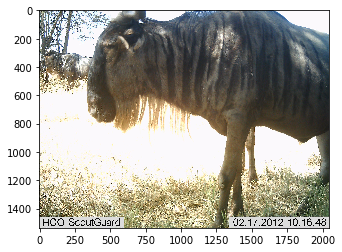

In [4]:
img_path = 'Animal Test - Large set/Wildebeest/ASG000bck6.jpg'
img_array = cv2.imread(img_path)
new_array = cv2.resize(img_array, (224, 224))
#print(new_array)
x = np.array(new_array).reshape(-1, 224, 224, 3)
x = x/255.0

result = np.around(WildlifeModel.predict(x),decimals = 3)
print(result)
#0=buffalo, 1=cheetah, 2=elephant, 3=gazelle, 4=giraffe, 5=hartebeest, 6=lionfemale&cub, 7=lionmale, 
#8=ostrict, 9=secretarybird, 10=wildebeest, 11=zebra 
my_image = scipy.misc.imread(img_path)
imshow(my_image)

categories = ["Buffalo", "Cheetah", "Elephant", "GazelleThomsons", "Giraffe", "Hartebeest", 
              "Lionfemale&Cub", "Lionmale", "Ostrich", "SecretaryBird", "Wildebeest", "Zebra"]
print('The animal type is :{}'.format(categories[np.argmax(result)]))